In [8]:
import numpy as np
from random import seed 
from random import random
from random import sample
from typing import List
import math

In [9]:
# initialisation
Q = 100 # cte
n = 10 # nombre de ville
m = n #nombre de fourmis
C = 0.001 # qté de pheromone initiale
RO = 0.5 # coefficient d'evaporation
ALPHA = 5#cte
BETA = 1#cte
NCmax = 1000 #nbreaximale d'itération

In [10]:
# class ant
class Ant:
    allvilles = [i for i in range(n)]
    
    def __init__(self,current_ville):
        self.current_ville = current_ville
        self.visited_villes = []*0
    
    def get_currentVille(self):
        return self.current_ville
    
    def get_visitedVilles(self):
        return self.visited_villes
    
    def addVille(self,ville):
        self.visited_villes.append(ville)
        
    def move(self,ville):
        self.current_ville=ville
        self.visited_villes.append(ville)


In [11]:
# list of ants
ants = []
# intitialisation des phéromones
pheromone = []

#mat n*n
for i in range(n):
    pe = []
    for j in range(n):
        pe.append(C)
    pheromone.append(pe)
    

# coordonnées des villes
def generatevilles(n):
    LV = []
    seed(1)
    for i in range(n):
        x = random()*2000
        y = random()*2000
        LV.append([x,y])
    LV=np.array(LV)
    return LV

# distances entre les villes
def calculateDistances(L):
    D = []
    #boucle imbriquée
    for i in range(n):
        dLine = []
        for j in range(n):
            x = L[i][0] - L[j][0]
            y = L[i][1] - L[j][1]
            dLine.append(math.sqrt(pow(x,2)+pow(y,2)))
        D.append(dLine)
    return D


# distribution des fourmies entre les villes
def distributeAnts(ants : []):
    #generate list of ints non ordonée
    smpl = sample(range(n),n)
    for i in range(n) : 
        ant = Ant(smpl[i])
        ant.addVille(smpl[i])
        ants.append(ant)
    return



# visibilité  a revoir
def claculateVisibilite(L):
    V = []
    for i in range(n):
        dLine = []
        for j in range(n):
            x = L[i][0] - L[j][0]
            y = L[i][1] - L[j][1]
            dis = math.sqrt(pow(x,2)+pow(y,2))
            if dis == 0:
                dLine.append(0)
            else : 
                dLine.append(1/dis)
        V.append(dLine)
    return V
    

villes =  generatevilles(n)
  
distances = calculateDistances(villes)

visibilite = claculateVisibilite(villes)

distributeAnts(ants)
#villes


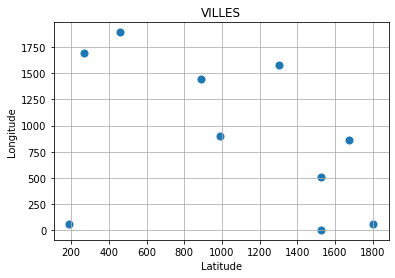

In [13]:
import matplotlib.pyplot as plt


plt.scatter(villes[:,0],villes[:,1], marker='o', s=50)

# Plot properties
plt.title("VILLES")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()
plt.close()

In [14]:
# opération sur les fourmies
#somme des visibilités et pheromones

def sommePherVis(Phero,Vis,alpha,beta,ant:Ant):
    somme = 0
    noneVisitedCities = set(ant.allvilles).difference(set(ant.get_visitedVilles()))
    noneVisitedCities = list(noneVisitedCities)
    for i in range(len(noneVisitedCities)):
        somme = somme+ (pow(Phero[ant.get_currentVille()][noneVisitedCities[i]],alpha))*(pow(Vis[ant.get_currentVille()][noneVisitedCities[i]],beta))
    return somme
    
# probabilité
def probabilites(Phero, Vis, alpha,beta,ant:Ant):
    probas = []
    # vlls sont les villes pas encore parcourus
    vlls = list(set(ant.allvilles).difference(set(ant.get_visitedVilles())))
    denominateur = sommePherVis(pheromone,claculateVisibilite(villes),ALPHA,BETA,ant)
    for i in range(len(vlls)):
        p = (pow(Phero[ant.get_currentVille()][vlls[i]],alpha))*(pow(Vis[ant.get_currentVille()][vlls[i]],beta))/denominateur
        
        probas.append(p)
    return probas

 # on retourne l'indice de la proba maximale
# best ville
def villeMaxProba(Pher, Vis, alpha,beta,ant:Ant):
    p = probabilites(Pher, Vis, alpha,beta,ant)
    max_index = np.argmax(p)
    # list des villes non encore visitée
    vlls = list(set(ant.allvilles).difference(set(ant.get_visitedVilles())))
    return vlls[max_index]

In [15]:
# Moving Ants
# Cycle 1 :
def moveAntOnce(ants: [],Pher, Vis, alpha,beta):
    for i in range(n):
        ville = villeMaxProba(Pher, Vis, alpha,beta,ants[i])
        ants[i].move(ville)
    

# mise à jour des pheromones
def evaporation(Pher,ro):
    phern=[]
    for i in range(n):
        pe = []
        for j in range(n):
            pe.append(Pher[i][j]*ro)
        phern.append(pe)
    return phern

def longueurTrajet(ant : Ant,distances):
    l = 0
    for i in range(len(ant.get_visitedVilles())-1):
        l += distances[ant.get_visitedVilles()[i]][ant.get_visitedVilles()[i+1]]
    l += distances[ant.get_visitedVilles()[0]][ant.get_visitedVilles()[len(ant.get_visitedVilles())-1]] 
    return l

def updatePheromone(ants:[], Pher, ro,distances): 
    Pher = evaporation(Pher,ro)
    for i in range(m):
        L = longueurTrajet(ants[i],distances)
        newPher = Q / L
        for k in range(len(ants[i].get_visitedVilles())-1):
            Pher[ants[i].get_visitedVilles()[k]][ants[i].get_visitedVilles()[k+1]] += newPher
            Pher[ants[i].get_visitedVilles()[k+1]][ants[i].get_visitedVilles()[k]] += newPher
            
        Pher[ants[i].get_visitedVilles()[0]][ants[i].get_visitedVilles()[len(ants[i].get_visitedVilles())-1]] += newPher
        Pher[ants[i].get_visitedVilles()[len(ants[i].get_visitedVilles())-1]][ants[i].get_visitedVilles()[0]] += newPher
    return Pher

        



    



In [16]:
#our main program func   
def moveAnts(ants : [],Pher , Vis , alpha , beta , ro , distances):
    for k in range(NCmax):
        #initialise la liste des fourmies à chaque itération
        ants = []
        distributeAnts(ants)
        for i in range(n-1):
            moveAntOnce(ants,Pher, Vis, alpha,beta)
        Pher = updatePheromone(ants,Pher, ro,distances)
    for i in range(m):
        print(ants[i].get_visitedVilles())
    return ants
    
ants = moveAnts(ants,pheromone,visibilite,ALPHA,BETA,RO,distances)

[9, 6, 4, 0, 8, 3, 7, 2, 1, 5]
[8, 0, 4, 6, 9, 5, 1, 2, 7, 3]
[5, 1, 2, 7, 3, 8, 0, 4, 6, 9]
[0, 8, 3, 7, 2, 1, 5, 9, 6, 4]
[6, 9, 5, 1, 2, 7, 3, 8, 0, 4]
[1, 5, 9, 6, 4, 0, 8, 3, 7, 2]
[3, 7, 2, 1, 5, 9, 6, 4, 0, 8]
[7, 3, 8, 0, 4, 6, 9, 5, 1, 2]
[4, 6, 9, 5, 1, 2, 7, 3, 8, 0]
[2, 7, 3, 8, 0, 4, 6, 9, 5, 1]


In [17]:
# chemins 
chemins = []
for i in range(m-1):
    chemins.append(ants[i].get_visitedVilles())
chemins
def get_distance(v1,v2):
    return distances[v1][v2]

def calculate_best(chemins):
    couts=[]
    for chemin in chemins:
        cout = 0
        for i in range(n-1):
            cout += distances[chemin[i]][chemin[i+1]]
        cout+= distances[chemin[0]][chemin[n-1]]
        couts.append(cout)
    return { 
                "chemin" : chemins[np.argmin(couts)],
                "cout" : couts[np.argmin(couts)]
           }

best = calculate_best(chemins)

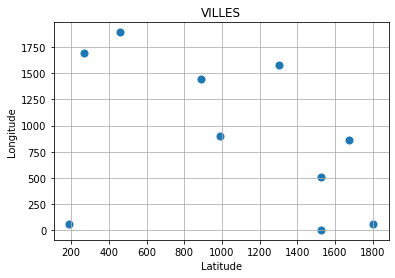

In [19]:
import matplotlib.pyplot as plt


plt.scatter(villes[:,0],villes[:,1], marker='o', s=50)

# Plot properties
plt.title("VILLES")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()
plt.close()

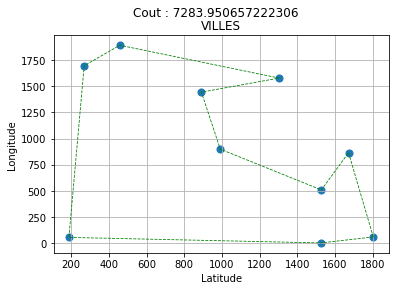

In [18]:
import matplotlib.pyplot as plt
# Plot nodes
ch = best["chemin"].copy()
ch.append(best["chemin"][0])


plt.scatter(villes[:,0],villes[:,1], marker='o', s=50)
plt.plot(villes[ch, 0], villes[ch, 1], c='g', linewidth=0.8, linestyle="--")

# Plot properties
plt.title("VILLES")
plt.suptitle("Cout : "+str(best['cout']))
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()
plt.close()